In [24]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import MinMaxScaler


In [2]:
df = pd.read_csv('Mall_Customers.csv')
df

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


## Data Cleaning

In [3]:
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [4]:
df.duplicated().sum()

np.int64(0)

In [5]:
df['CustomerID'].unique()

array([  1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,  13,
        14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,  26,
        27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,  39,
        40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,  52,
        53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,  65,
        66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,  78,
        79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,  91,
        92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103, 104,
       105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117,
       118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130,
       131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143,
       144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156,
       157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169,
       170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 18

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [7]:
df.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [8]:
cols = ['Age', 'Annual Income (k$)', 'Spending Score (1-100)']
outliers_number={}
for col in cols:
    q1=df[col].quantile(0.25)
    q3=df[col].quantile(0.75)
    IQR= q3-q1
    lower= q1 - 1.5 * IQR
    upper= q3 + 1.5 * IQR
    outlier= df[(df[col]<lower) | (df[col]>upper)]
    outliers_number[col]=outlier.shape[0]
print(outliers_number)


{'Age': 0, 'Annual Income (k$)': 2, 'Spending Score (1-100)': 0}


## Data Visualization (EDA)

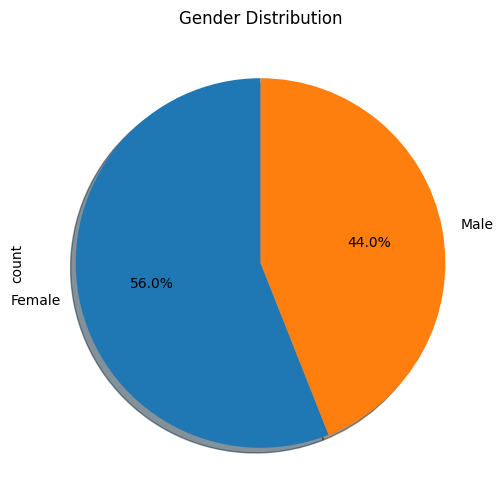

In [9]:
gender_counts = df['Gender'].value_counts()

# Plot pie chart
plt.figure(figsize=(6,6))
gender_counts.plot.pie(autopct='%1.1f%%', startangle=90, shadow=True)
plt.title('Gender Distribution')
plt.show()

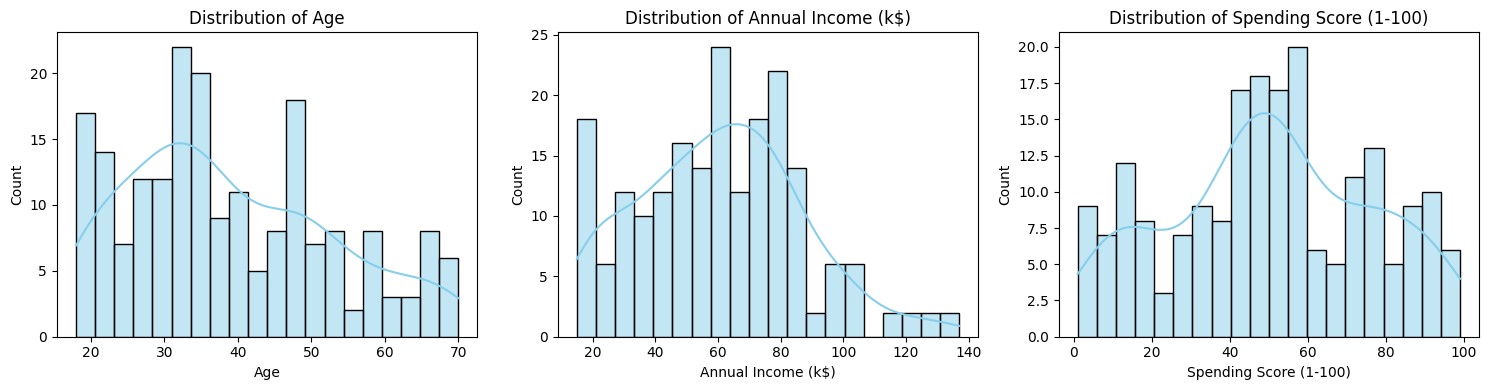

In [10]:
cols = ['Age', 'Annual Income (k$)', 'Spending Score (1-100)']

# Plot
plt.figure(figsize=(15, 4))
for i, col in enumerate(cols):
    plt.subplot(1, 3, i+1)
    sns.histplot(df[col], kde=True, bins=20, color='skyblue')
    plt.title(f'Distribution of {col}')
plt.tight_layout()
plt.show()

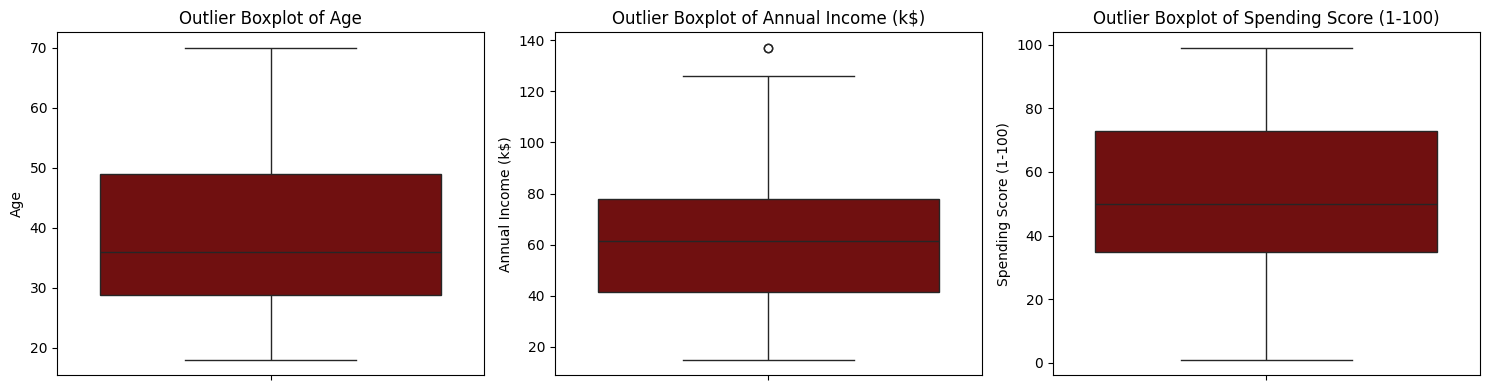

In [11]:
plt.figure(figsize=(15, 4))
for i, col in enumerate(cols):
    plt.subplot(1, 3, i+1)
    sns.boxplot(data=df, y=col, color='maroon')
    plt.title(f'Outlier Boxplot of {col}')
plt.tight_layout()
plt.show()

## Encoding

In [12]:
df = pd.get_dummies(df, columns=['Gender'],dtype = int)
df

,CustomerID,Age,Annual Income (k$),Spending Score (1-100),Gender_Female,Gender_Male
0,1,19,15,39,0,1
1,2,21,15,81,0,1
2,3,20,16,6,1,0
3,4,23,16,77,1,0
4,5,31,17,40,1,0
...,...,...,...,...,...,...
195,196,35,120,79,1,0
196,197,45,126,28,1,0
197,198,32,126,74,0,1
198,199,32,137,18,0,1


## Standardization

In [13]:
X = df[['Annual Income (k$)', 'Spending Score (1-100)']]

# Scale the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_scaled

array([[-1.73899919, -0.43480148],
       [-1.73899919,  1.19570407],
       [-1.70082976, -1.71591298],
       [-1.70082976,  1.04041783],
       [-1.66266033, -0.39597992],
       [-1.66266033,  1.00159627],
       [-1.62449091, -1.71591298],
       [-1.62449091,  1.70038436],
       [-1.58632148, -1.83237767],
       [-1.58632148,  0.84631002],
       [-1.58632148, -1.4053405 ],
       [-1.58632148,  1.89449216],
       [-1.54815205, -1.36651894],
       [-1.54815205,  1.04041783],
       [-1.54815205, -1.44416206],
       [-1.54815205,  1.11806095],
       [-1.50998262, -0.59008772],
       [-1.50998262,  0.61338066],
       [-1.43364376, -0.82301709],
       [-1.43364376,  1.8556706 ],
       [-1.39547433, -0.59008772],
       [-1.39547433,  0.88513158],
       [-1.3573049 , -1.75473454],
       [-1.3573049 ,  0.88513158],
       [-1.24279661, -1.4053405 ],
       [-1.24279661,  1.23452563],
       [-1.24279661, -0.7065524 ],
       [-1.24279661,  0.41927286],
       [-1.20462718,

## K-mean cluster and 2D visualization 

In [14]:
kmeans = KMeans(n_clusters=5, random_state=42) # tried 3 but when done 5 it is much better
df['Cluster'] = kmeans.fit_predict(X_scaled)


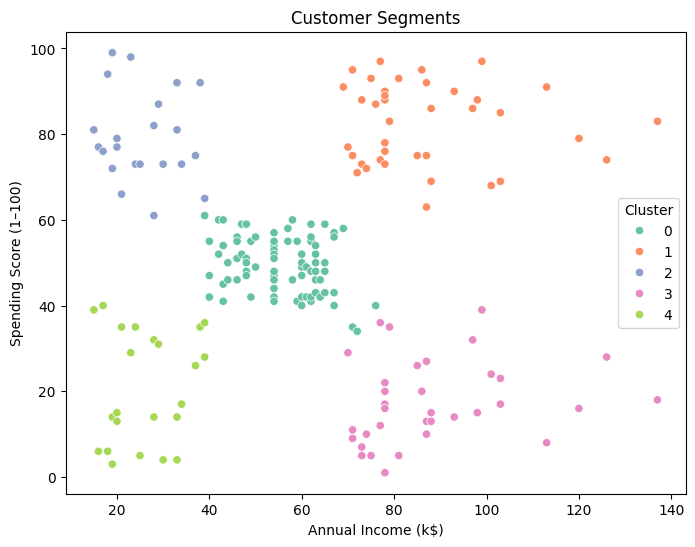

In [15]:
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df, x='Annual Income (k$)', y='Spending Score (1-100)', hue='Cluster', palette='Set2')
plt.title('Customer Segments')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1–100)')
plt.show()


## Bonus DBSCAN and average spending analyzation

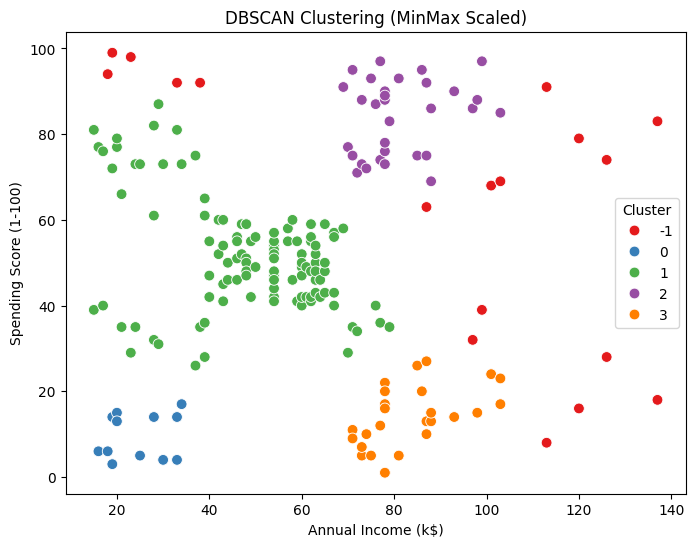

In [ ]:
X = df[['Annual Income (k$)', 'Spending Score (1-100)']]#DBSCAN better of with minmaxscaler not much but better
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)
dbscan = DBSCAN(eps=0.1, min_samples=7)
labels = dbscan.fit_predict(X_scaled)
df['Cluster'] = labels
plt.figure(figsize=(8,6))
sns.scatterplot(
    data=df, 
    x='Annual Income (k$)', 
    y='Spending Score (1-100)', 
    hue='Cluster', 
    palette='Set1',
    s=60
)
plt.title('DBSCAN Clustering (MinMax Scaled)')
plt.show()


In [16]:
dbscan = DBSCAN(eps=0.25, min_samples=4,metric='manhattan') # best compination got after many trials
clusters = dbscan.fit_predict(X_scaled)
df['Cluster'] = clusters


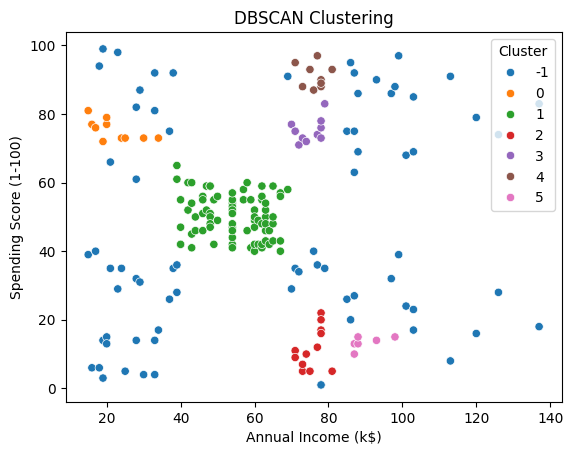

In [17]:
sns.scatterplot(data=df, x='Annual Income (k$)', y='Spending Score (1-100)', hue='Cluster', palette='tab10')
plt.title('DBSCAN Clustering')
plt.show()


In [ ]:

dbscan = DBSCAN(eps=0.25, min_samples=4)
labels = dbscan.fit_predict(X_scaled)
df['Cluster'] = labels


In [21]:
avg_spending = df.groupby('Cluster')['Spending Score (1-100)'].mean()
print(avg_spending)

Cluster
0    50.2
Name: Spending Score (1-100), dtype: float64


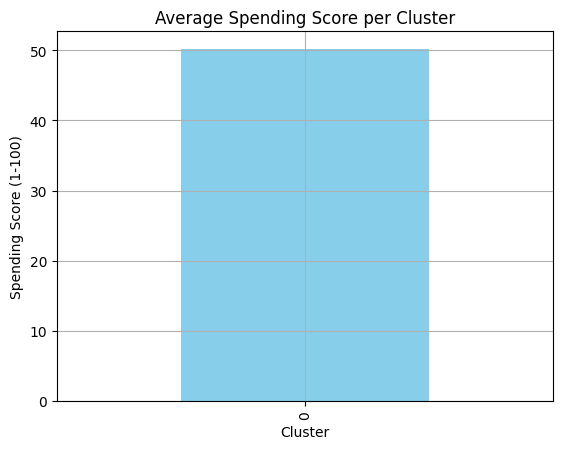

In [23]:
avg_spending.plot(kind='bar', color='skyblue')
plt.title("Average Spending Score per Cluster")
plt.ylabel("Spending Score (1-100)")
plt.xlabel("Cluster")
plt.grid(True)
plt.show()
